In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_63621_Z')

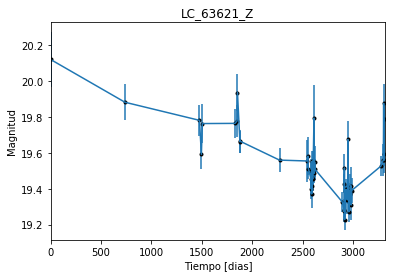

In [2]:
data = np.genfromtxt('LC_63621_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_63621_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

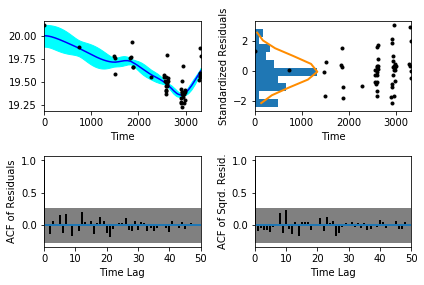

In [5]:
sample.assess_fit()

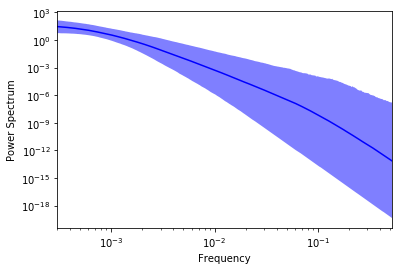

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_63621_Z')

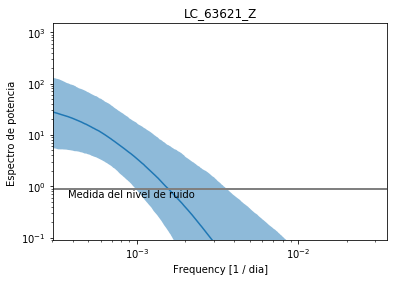

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_63621_Z')

Text(0.5,1,'Prediccion , valor esperado LC_63621_Z')

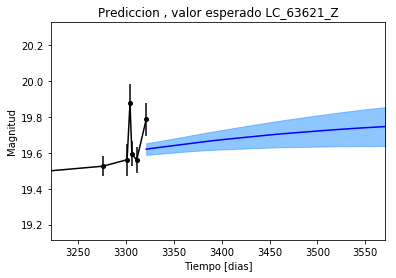

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_63621_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_63621_Z')

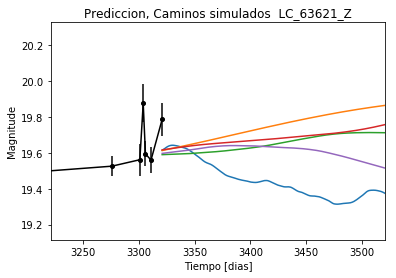

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_63621_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_63621_Z')

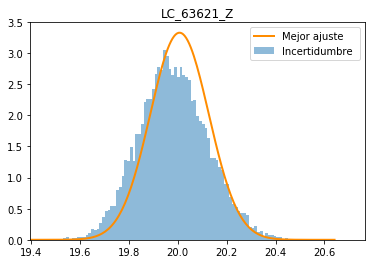

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_63621_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_63621_Z')

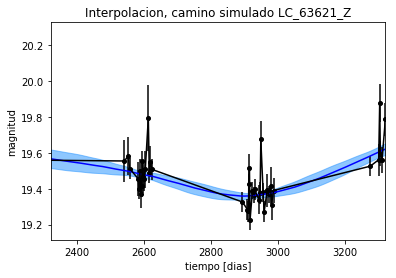

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_63621_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_63621_Z')

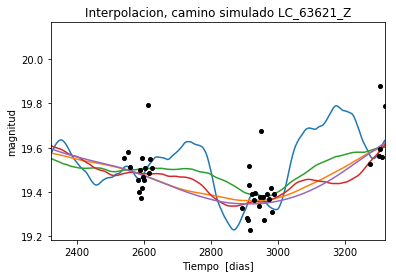

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_63621_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 507.149803329
Median: 0.00990606130714
Standard deviation: 0.202087808265
68% credibility interval: [ 0.00067905  0.19465985]
95% credibility interval: [  3.35963785e-04   7.86514689e-01]
99% credibility interval: [  3.06808708e-04   9.97049234e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 539.123246249
Median: 0.000811927095128
Standard deviation: 0.0704661019395
68% credibility interval: [ 0.00037407  0.01052021]
95% credibility interval: [ 0.00031057  0.16211715]
99% credibility interval: [  3.02759143e-04   5.86143328e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 785.36245558
Median: 0.0177955418905
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 840.221111885
Median: 61.7739957819
Standard deviation: 1.69028605774
68% credibility interval: [ 59.8210939   62.98878432]
95% credibility interval: [ 57.24832037  63.63421473]
99% credibility interval: [ 55.23916184  63.81863605]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 517.682718124
Median: 0.695375152011
Standard deviation: 2.15734628016
68% credibility interval: [ 0.06145656  3.94640772]
95% credibility interval: [ 0.01213738  7.24521258]
99% credibility interval: [  9.42108969e-03   9.66014948e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 421.145185241
Median: 0.194160303374
Standard deviation: 7.70366806412
68% credibility interval: [ 0.00695465  4.56219774]
95% credibility interval: [  4.4

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 12018.1169376
Median: 3.56728847518e-26
Standard deviation: 3.78247714235e+93
68% credibility interval: [  2.69850311e-61   1.69328508e-02]
95% credibility interval: [  4.37943473e-95   1.23080003e+02]
99% credibility interval: [  1.01237750e-107   1.14911993e+061]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1948.37804554
Median: 19.7059977902
Standard deviation: 0.141699686625
68% credibility interval: [ 19.59761136  19.83571932]
95% credibility interval: [ 19.45940761  20.04299028]
99% credibility interval: [ 19.3295372   20.20648389]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 410.319148238
Median: 0.000106363102595
Standard deviation: 0.211247730004
68% credibility interval: [ 0.          0.16967564]
95% credibility interval: [ 0.          0.81816729]
99% credibility interval: [ 0.          1.00343512]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 410.319148238
Median: 0.000106363102595
Standard deviation: 0.211247730004
68% credibility interval: [ 0.          0.16967564]
95% credibility interval: [ 0.          0.81816729]
99% credibility interval: [ 0.          1.00343512]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1443.81664373
Median: 0.0
Standard deviation: 0.000221853351276
68

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 840.221111885
Median: 61.7739957819
Standard deviation: 1.69028605774
68% credibility interval: [ 59.8210939   62.98878432]
95% credibility interval: [ 57.24832037  63.63421473]
99% credibility interval: [ 55.23916184  63.81863605]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1486.15537565
Median: 0.0460999602182
Standard deviation: 0.0620014003031
68% credibility interval: [ 0.02450793  0.09504026]
95% credibility interval: [ 0.01385855  0.2072746 ]
99% credibility interval: [ 0.00935885  0.36591687]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1460.96888436
Median: 1.20554041351
Standard deviation: 0.179630051593
68% credibility interval: [ 1.04562643  1.39595556]
95% credibility interval: [ 0.91402576  1.61677717]
99% credibility interval: [ 0.83854666  1.79268445]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2047.77597511
Median: 2.4986079304e-05
Standard deviation: 0.0878800285656
68% credibility interval: [  4.51032014e-07   8.53361884e-04]
95% credibility interval: [  5.94667935e-09   1.65928747e-02]
99% credibility interval: [  8.25263202e-65   1.60098897e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 507.149803329
Median: (-0.0622416188571+0j)
Standard deviation: 1.83685229213
68% credibility interval: [-1.22308394+0.j -0.00426661+0.j]
95% credibility interval: [ -4.94181754e+00+0.j          -2.11092272e-03-0.00250168j]
99% credibility interval: [ -6.26464510e+00+0.j          -1.92773597e-03-0.00031797j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 539.123246249
Median: (-0.00510148839461+0.548125403943j)
Standard deviation: 1.39920590568
68% credibility interval: [-0.06610044+0.05464207j -0.00235032+0.j        ]
95% credibility interval: [-1.01861207+0.j -0.00195135+0.j]
99% credibility interval: [ -3.68284715e+00+1.63483957j  -1.90229180e-03+0.j        ]
Posterior summary for parameter ar_roots  element 2
----